# Data Preprocessing

In [2]:
import pandas as pd
data_df = pd.read_csv("./teenager_sns.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

## Scaling

### Z-Score Scaling

In [10]:

from sklearn import preprocessing
scale = preprocessing.scale(data_df['age'], with_mean = data_df['age'].mean(), with_std = data_df['age'].std())
data_scale = pd.DataFrame(scale, columns=['age_zscore'])
data_scale

,age_zscore
0,0.125740
1,0.102706
2,0.043402
3,0.112123
4,0.127394
...,...
29995,-0.239116
29996,-0.280221
29997,-0.281239
29998,-0.205647


### 0-1 Scaling

In [11]:
scale = preprocessing.minmax_scale(data_df['age'])
data_scale['age_01scaling'] = scale
data_scale

,age_zscore,age_01scaling
0,0.125740,0.153080
1,0.102706,0.151337
2,0.043402,0.146850
3,0.112123,0.152050
4,0.127394,0.153205
...,...,...
29995,-0.239116,0.125471
29996,-0.280221,0.122360
29997,-0.281239,0.122283
29998,-0.205647,0.128003


### Decimal

In [12]:
k = 1
data_scale['age_decimal'] = data_df.age/10**k
data_scale

,age_zscore,age_01scaling,age_decimal
0,0.125740,0.153080,1.8982
1,0.102706,0.151337,1.8801
2,0.043402,0.146850,1.8335
3,0.112123,0.152050,1.8875
4,0.127394,0.153205,1.8995
...,...,...,...
29995,-0.239116,0.125471,1.6115
29996,-0.280221,0.122360,1.5792
29997,-0.281239,0.122283,1.5784
29998,-0.205647,0.128003,1.6378


### Logistic scaling

In [13]:
from math import e
data_scale['logistic_sclaing'] = 1 / (1 + e**(-data_df.age))
data_scale

,age_zscore,age_01scaling,age_decimal,logistic_sclaing
0,0.125740,0.153080,1.8982,1.0
1,0.102706,0.151337,1.8801,1.0
2,0.043402,0.146850,1.8335,1.0
3,0.112123,0.152050,1.8875,1.0
4,0.127394,0.153205,1.8995,1.0
...,...,...,...,...
29995,-0.239116,0.125471,1.6115,1.0
29996,-0.280221,0.122360,1.5792,1.0
29997,-0.281239,0.122283,1.5784,1.0
29998,-0.205647,0.128003,1.6378,1.0


## Discretization

### From Bunch/Dictionary to DataFrame

In [37]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Equal-Distance Discretization

<AxesSubplot: >

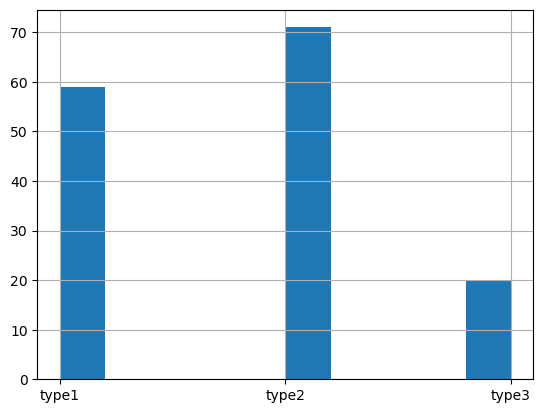

In [38]:
pd.cut(iris_df['sepal length (cm)'], bins= 4)
[iris_sepalLen_EqDis, bins] = pd.cut(iris_df['sepal length (cm)'], bins= 3, labels=['type1', 'type2', 'type3'],retbins=True) # retbins return the bin start and end
iris_sepalLen_EqDis
bins
iris_sepalLen_EqDis.hist()


### Equal-Frequency Discretization

<AxesSubplot: >

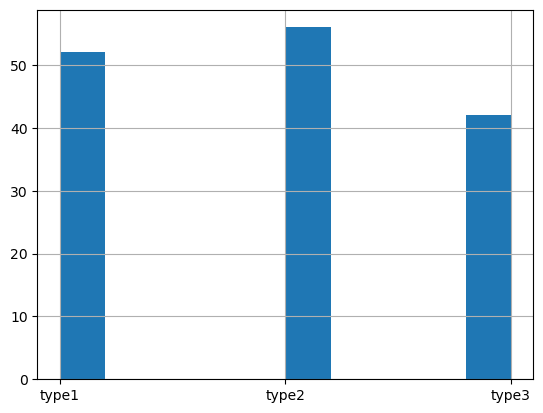

In [39]:
[iris_sepalLen_EqFreq, retbins] = pd.qcut(iris_df['sepal length (cm)'], q=3, labels=['type1', 'type2', 'type3'], retbins=True)
iris_sepalLen_EqFreq.hist()


### Clustering_based discretization

In [42]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


c:\Users\SouthCat\anaconda3\envs\cs324\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\SouthCat\anaconda3\envs\cs324\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot: >

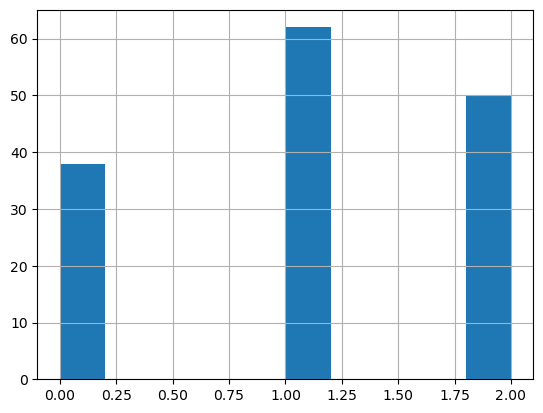

In [54]:
from sklearn.cluster import k_means
result = k_means(iris_df, 3)
iris_kmeans = pd.Series(result[1]) 
iris_kmeans.hist()

### 3σ-based discretization

<AxesSubplot: >

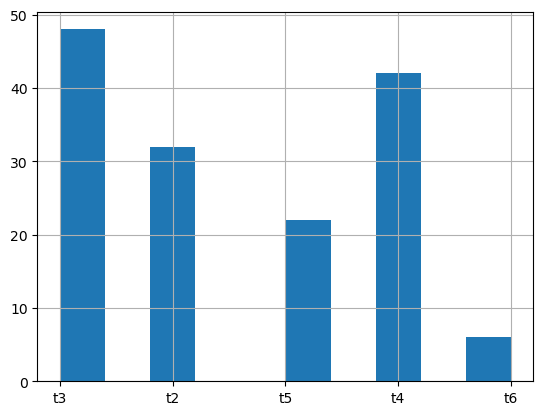

In [57]:
u = iris_df['sepal length (cm)'].mean()
std = iris_df['sepal length (cm)'].std()

# get the 8 intervals
iris_3u = [u + x * std for x in range(-3, 4)]
iris_3u

[iris_sepalLen_3uDis, bins] = pd.cut(iris_df['sepal length (cm)'], bins = iris_3u, labels = ['t1','t2','t3','t4','t5','t6'], retbins=True)
#bins=iris_3u, labels = range(9), retbins=True
iris_sepalLen_3uDis.hist()


### Supervised Discretization - Information Gain

Why do we need supervised discretization? Not because we need to get the classification result, but because we need to get the interval information with respect to every attribute and focus on the interval information - which is the quantified information to express a sample.

In [35]:
# Text to Numeric
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_excel('./lenses.xlsx')
data_new = pd.DataFrame()
for col in data.columns:
    model = LabelEncoder()
    data_new[col] = model.fit_transform(data[col])
data_new

,age,prescript,astigmatic,tearRate,class
0,2,1,0,1,1
1,2,1,0,0,2
2,2,1,1,1,1
3,2,1,1,0,0
4,2,0,0,1,1
5,2,0,0,0,2
6,2,0,1,1,1
7,2,0,1,0,0
8,0,1,0,1,1
9,0,1,0,0,2


c:\Users\SouthCat\anaconda3\envs\cs324\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot: >

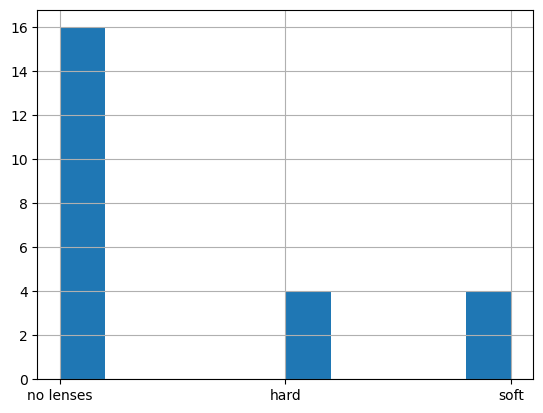

In [59]:
# model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model_x = data_new.iloc[:,0:-1]
model_y = data_new.iloc[:,-1]
model_y_1 = data.iloc[:,-1]
model.fit(model_x, model_y_1)
model.predict([[0,1,0,1]])
result = model.predict(data_new.iloc[:,0:-1])
lenses_decision_tree = pd.Series(result)
lenses_decision_tree.hist()

### Supervised Discretization - Chi-Merge

In [ ]:
# from scorecardbundle.feature_discretization.ChiMerge import ChiMerge

## Data Redundancy

When strong correlations exist among different attributes,
then we say that the some attributes can be derived from the
others (Recall linear dependency for vectors)

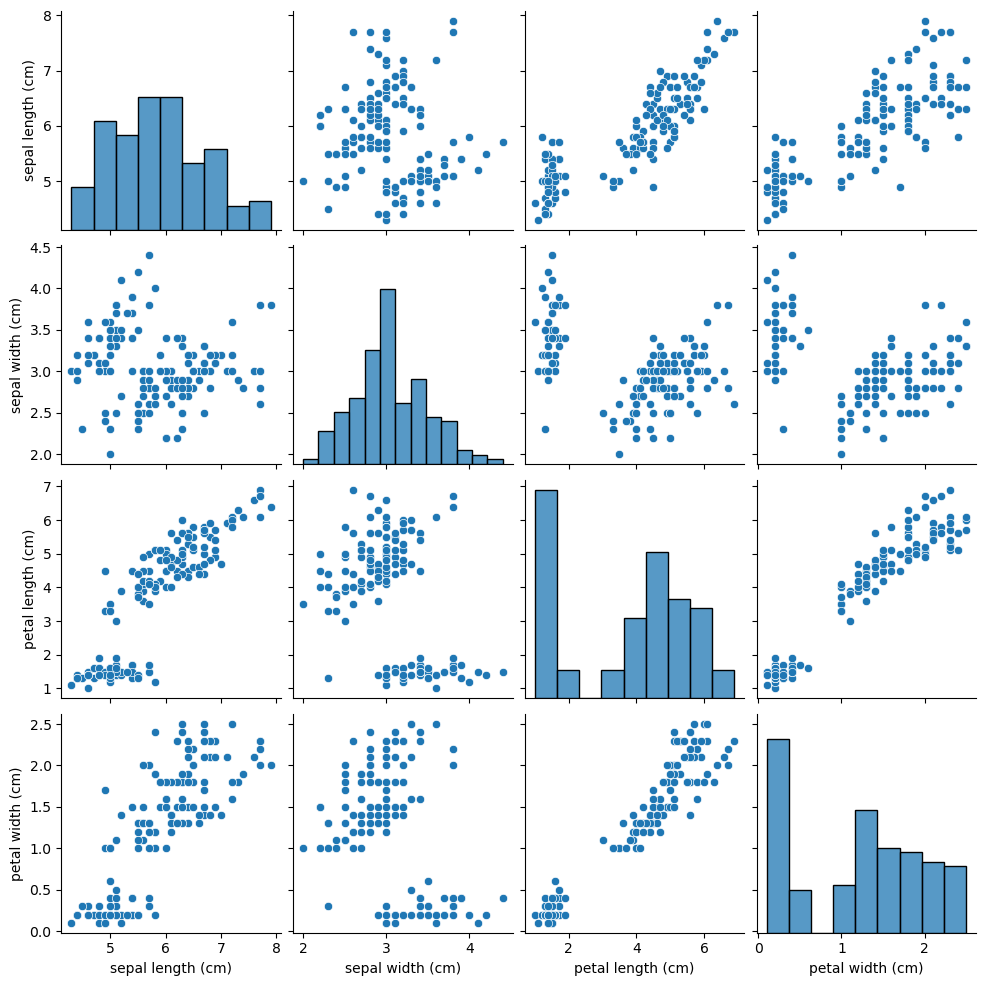

In [3]:
import seaborn as sns
sns.pairplot(iris_df)

In [4]:
iris_pearson = iris_df.corr()
iris_pearson

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot: >

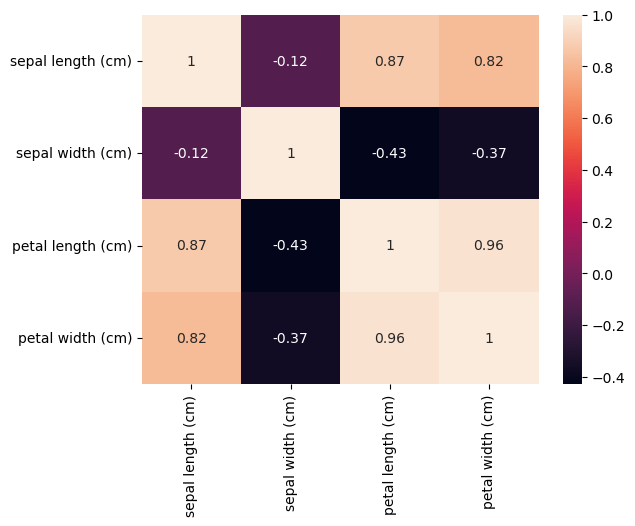

In [6]:
sns.heatmap(iris_pearson, annot=True)

## Missing Data

In [7]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('./teenager_sns.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

### Deleting Directly

In [8]:

data_df = data_df.dropna(axis=0, how='any')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24005 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      24005 non-null  int64  
 1   gender        24005 non-null  object 
 2   age           24005 non-null  float64
 3   friends       24005 non-null  int64  
 4   basketball    24005 non-null  int64  
 5   football      24005 non-null  int64  
 6   soccer        24005 non-null  int64  
 7   softball      24005 non-null  int64  
 8   volleyball    24005 non-null  int64  
 9   swimming      24005 non-null  int64  
 10  cheerleading  24005 non-null  int64  
 11  baseball      24005 non-null  int64  
 12  tennis        24005 non-null  int64  
 13  sports        24005 non-null  int64  
 14  cute          24005 non-null  int64  
 15  sex           24005 non-null  int64  
 16  sexy          24005 non-null  int64  
 17  hot           24005 non-null  int64  
 18  kissed        24005 non-nu

### Fill with zero

In [11]:

data_df = pd.read_csv('./teenager_sns.csv')
data_df['age'] = data_df['age'].fillna(0)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

### Fill with mean

In [12]:

data_df = pd.read_csv('./teenager_sns.csv')
data_df['age'] = data_df['age'].fillna(data_df['age'].mean())
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

## Outliers

<AxesSubplot: >

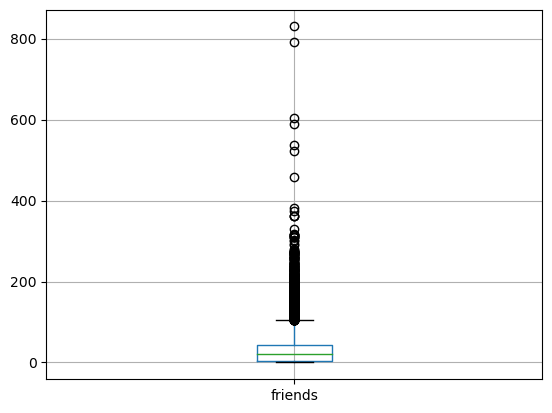

In [13]:
data_df = pd.read_csv('./teenager_sns.csv')
data_df.boxplot(column=['friends'])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor